# Trabajo Práctico Final - Electrónica Aplicada 3
### UTN - Facultad Regional de Avellaneda

### Enunciado

Oscilador con par diferencial de frecuencia variable, frecuencia central 12 MHz, tensión de salida 1 volt pico, apto para cargar con 50 ohm, una vez cumplido agregar ajuste de amplitud. O control aut de amplitud.

In [15]:
# Herramientas útiles
import math
from engineering_notation import EngNumber

# El símbolo de ohm en Unicode
ohm_symbol = "\u03A9"

# Datos
f_0 = 12*10**6
R_L = 50
a = 2
b = 5
Q_0 = 100
pi = math.pi

Para comenzar, se asume una bobina de 300nHy:

In [23]:
L = 300*(10**-9)
L_eng = EngNumber(L)

print("L = " + str(L_eng) + "Hy")

L = 300nHy


Con esta bobina, se calcula la capacidad equivalente para que el circuito resuene en 12MHz

$ C(eq) = \frac{1}{(2 \pi f_0)^{2} L} $

In [17]:
C_eq = 1/((2 * pi * f_0)**2 * L)

C_eq_eng = EngNumber(C_eq)

print("Ceq = " + str(C_eq_eng) + "F")

Ceq = 586.35pF


A partir de este punto, se comienza a calcular el capacitor C4, de forma de cumplir el enunciado y poder cargar con 50ohm a la salida. Para ello, se define que $X_{C4}$ debe ser aproximadamente 10 veces menor a $R_L$ y se asume:

In [18]:
X_C4 = 5

Aquí se podrá calcular $C_4$ y luego $C_3$.

$$ C_4 = \frac{1}{2 \pi f_0 X_{C4}} $$

$$ C_3 = \frac{C_4}{b-1} $$

In [19]:
C_4 = 1/(2*pi*f_0*X_C4)
C_4_eng = EngNumber(C_4)

C_3 = C_4 / (b - 1)
C_3_eng = EngNumber(C_3)

print("C4: " + str(C_4_eng) + "F")
print("C3: " + str(C_3_eng) + "F")

C4: 2.65nF
C3: 663.15pF


Por último, se obtiene la capacidad equivalente del divisor capacitivo de la salida:

$$ C_{eq_2} = \frac{C_3 C_4}{C_3 + C_4} $$

In [20]:
C_eq_2 = (C_3 * C_4)/(C_3 + C_4)
C_eq_2_eng = EngNumber(C_eq_2)

print("C_eq_2: " + str(C_eq_2_eng) + "F")

C_eq_2: 530.52pF


Se continúa calculando la capacidad equivalente de los capacitores $C_1$ y $C_2$. Hasta aquí no se considera Cvariable en el diseño del oscilador.

$$ C_{eq_1} = C_{eq} - C_{eq_2} $$

$$ C_2 = a  C_{eq_1} $$

$$ C_1 = \frac{C_2}{a - 1} $$

In [21]:
C_eq_1 = C_eq - C_eq_2
C_eq_1_eng = EngNumber(C_eq_1)



C_2 = a * C_eq_1
C_2_eng = EngNumber(C_2)


C_1 = C_2 / (a-1)
C_1_eng = EngNumber(C_1)


print("C_eq_1: "  + str(C_eq_1_eng) + "F")
print("C_2: "     + str(C_2_eng) + "F")
print("C_1: "     + str(C_1_eng) + "F")

C_eq_1: 55.83pF
C_2: 111.67pF
C_1: 111.67pF


Como se trabaja con una bobina ideal, se procede a calcular su $R_T$ y también la resistencia $R_L$ reflejada, para obtener la Rtotal siendo el paralelo entre ambas:

$$ R_T = Q_0 2 \pi f_0 L $$

$$ R'_L = R_L  b^{2} $$

$$ R_{TOTAL} = \frac{R_T R'_L}{R_T + R'_L} $$

In [22]:
R_T = Q_0 * 2 * pi * f_0 * L
R_T_eng = EngNumber(R_T)

R_L_PRIMA = R_L * b**2
R_L_PRIMA_eng = EngNumber(R_L_PRIMA)

R_TOTAL = (R_T * R_L_PRIMA)/(R_T + R_L_PRIMA)
R_TOTAL_eng = EngNumber(R_TOTAL)


print("R_T: "           + str(R_T_eng) + ohm_symbol)
print("R_L_PRIMA: "     + str(R_L_PRIMA_eng) + ohm_symbol)
print("R_TOTAL: "       + str(R_TOTAL_eng) + ohm_symbol)

R_T: 2.26kΩ
R_L_PRIMA: 1.25kΩ
R_TOTAL: 805.09Ω


Finalmente, se plantea el siguiente circuito ideal, considerando una fuente de corriente ideal que entrega 10mA al par diferencial:


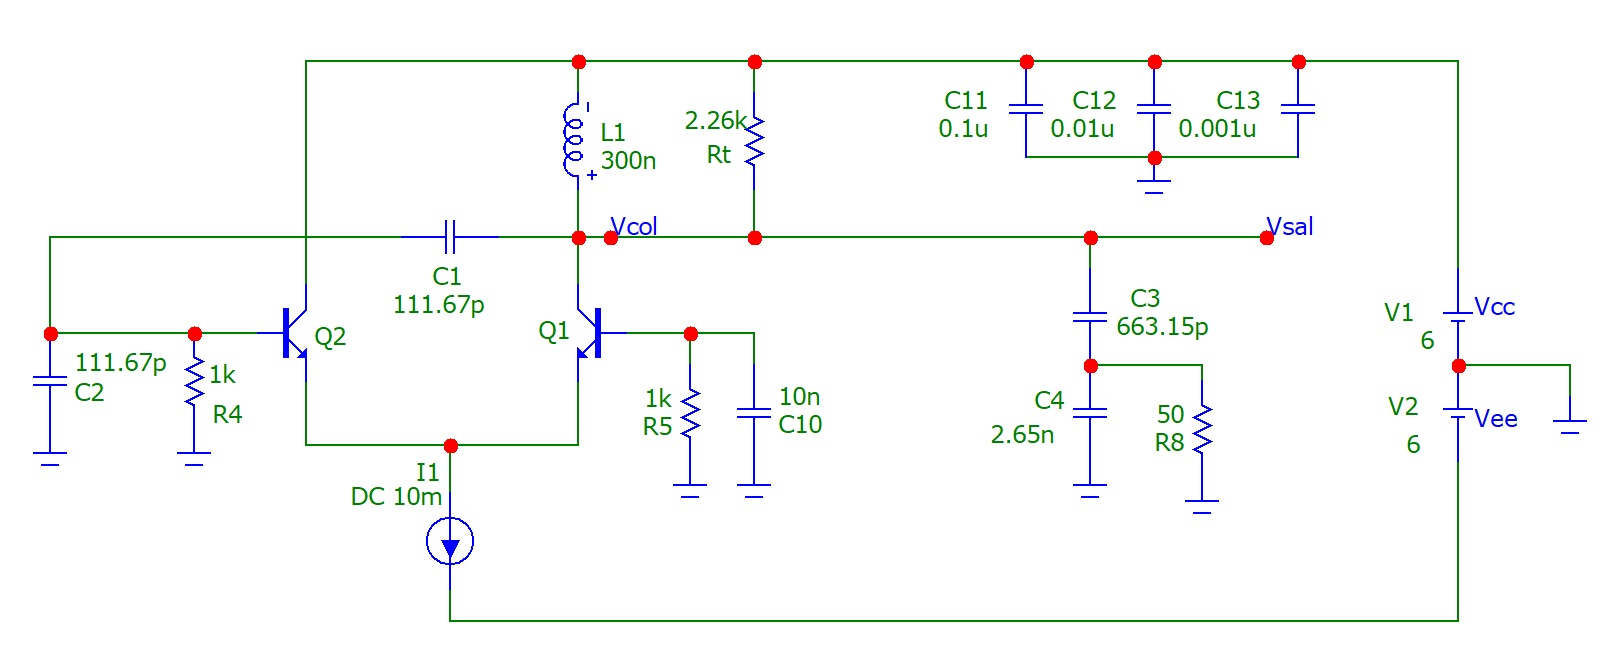